# *필요 라이브러리

In [1]:
#필요 라이브러리, 패키지 불러오기
import pandas as pd
import seaborn as sns
import matplotlib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

In [2]:
#python에서 이상한 문자 나올 때 warnings import 하여 방지하기
import warnings
warnings.filterwarnings('ignore')
#plot 환경설정
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'
%matplotlib inline
#음수 표시
matplotlib.rc('axes', unicode_minus=False)

# 1. 클러스터링 - Kmeans
EDA, 통계적 검정을 통해 유의하게 판단되는 변수와, 도메인 지식을 통해 유의미하게 생각되는 변수 선택  
* '재발여부', '환자통증정도', '통증기간(월)', '가족력', '성별', '연령대', '입원기간', '직업', '수술 받은 계절', 'BMI'

In [3]:
# 필요한 컬럼 선택
df_derive = pd.read_csv('processed_data.csv')
selected_columns = ['재발여부','환자통증정도', '통증기간(월)', '가족력', '성별', '연령대', '입원기간', '직업', '수술 받은 계절', 'BMI']
X = df_derive[selected_columns]
X.head(3)

,재발여부,환자통증정도,통증기간(월),가족력,성별,연령대,입원기간,직업,수술 받은 계절,BMI
0,0,7,0.2,0.0,0,30-40대,1,사무직,봄,24.772097
1,0,7,5.0,1.0,0,10-20대,1,군인,봄,23.661439
2,0,5,24.0,0.0,0,10-20대,1,Unknown,봄,21.705129


## 1) 범주형 변수 one-hot encoding 및 연속형 변수 scaling

In [4]:
# 환자의 기본 정보 및 진단 관련 칼럼들로 구성된 데이터 준비
c1 = ['환자통증정도', '통증기간(월)', '가족력', '성별', '연령대', '입원기간', '직업', '수술 받은 계절', 'BMI']
X1 = X[c1]

# 범주형 칼럼 원핫인코딩
X1_encoded = pd.get_dummies(X1)

# 연속형 칼럼 데이터 스케일링
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1_encoded)

In [5]:
X1_encoded.head()

,환자통증정도,통증기간(월),가족력,성별,입원기간,BMI,연령대_10-20대,연령대_30-40대,연령대_50-60대,연령대_70대 이상,...,직업_운수업,직업_의료직,직업_자영업,직업_주부,직업_특수전문직,직업_학생,수술 받은 계절_가을,수술 받은 계절_겨울,수술 받은 계절_봄,수술 받은 계절_여름
0,7,0.2,0.0,0,1,24.772097,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
1,7,5.0,1.0,0,1,23.661439,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,5,24.0,0.0,0,1,21.705129,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,7,2.0,0.0,0,1,23.661439,True,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,8,1.0,0.0,0,2,27.943098,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [6]:
X1_encoded.columns

Index(['환자통증정도', '통증기간(월)', '가족력', '성별', '입원기간', 'BMI', '연령대_10-20대',
       '연령대_30-40대', '연령대_50-60대', '연령대_70대 이상', '직업_Unknown', '직업_건설업',
       '직업_공무원', '직업_교사', '직업_군인', '직업_노동직', '직업_농업', '직업_무직', '직업_사무직',
       '직업_사업가', '직업_예술가', '직업_운동선수', '직업_운수업', '직업_의료직', '직업_자영업', '직업_주부',
       '직업_특수전문직', '직업_학생', '수술 받은 계절_가을', '수술 받은 계절_겨울', '수술 받은 계절_봄',
       '수술 받은 계절_여름'],
      dtype='object')

## 2) Elbow Method & silhouette_coefficients
적절한 군집의 개수 설정의 기준이 됨
=> 6개 정도의 군집이 적절한 것으로 판단.

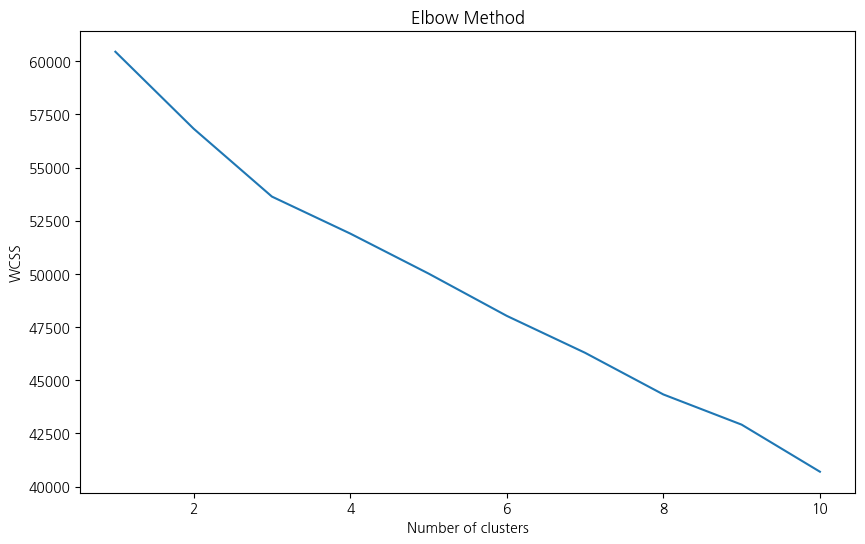

In [7]:
# 클러스터 수를 변화시키면서 WCSS 계산
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X1_scaled)
    wcss.append(kmeans.inertia_)

# Elbow 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

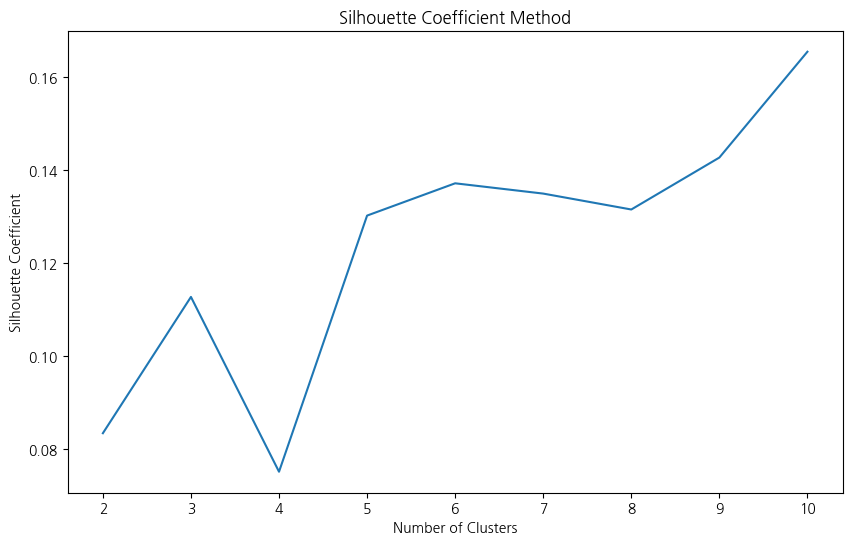

In [93]:
#실루엣 계수 -> 높을 수록 좋음

# 실루엣 점수를 저장할 리스트
silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X1_scaled)
    score = silhouette_score(X1_scaled, kmeans.labels_)
    silhouette_coefficients.append(score)

# 실루엣 점수에 대한 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.title('Silhouette Coefficient Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

## 3) 환자의 기본 정보 및 진단 관련 데이터 클러스터링 2차원, 3차원으로 시각화
변수의 개수에 따른 차원(변수 8개 - 8차원)에서, 군집에 따른 데이터를 바라보는 것이 바람직하나 시각적 용이성에 따라 2, 3차원으로 축소함.  
* 차원을 축소하는 과정에서 PCA를 사용함.
* 2차원, 3차원 0, 2, 4 군집만이 뚜렷하게 구분됨을 확인할 수 있음.

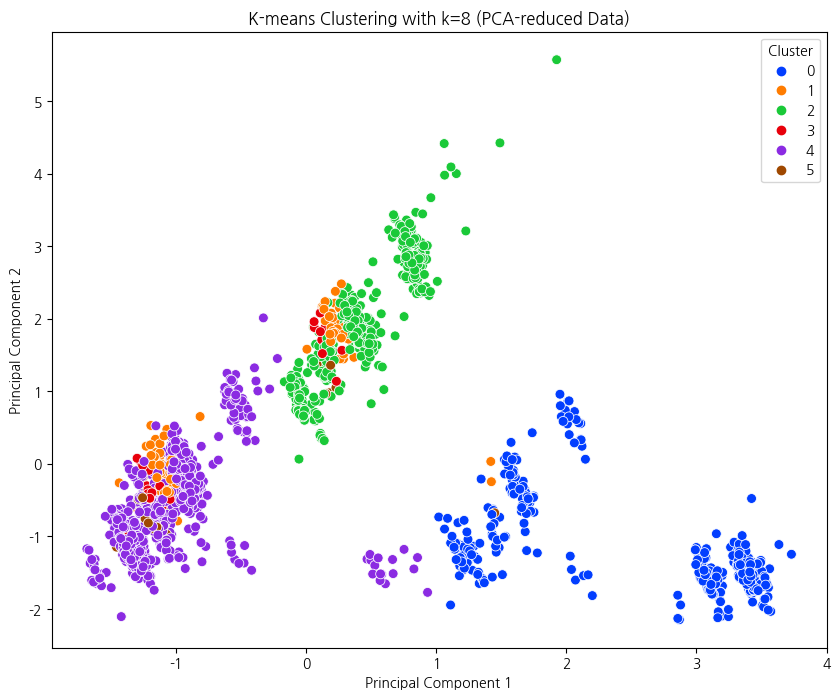

In [8]:
#k=6로 선정해 kmeans 클러스터링 수행
kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X1_scaled)

# PCA를 사용하여 데이터를 2차원으로 축소
pca = PCA(n_components=2)
X1_pca = pca.fit_transform(X1_scaled)

df_pca = pd.DataFrame(X1_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = y_kmeans

# Seaborn으로 클러스터링 결과 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='bright', data=df_pca, legend='full', s=50)

plt.title('K-means Clustering with k=8 (PCA-reduced Data)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.legend(title='Cluster')
plt.show()

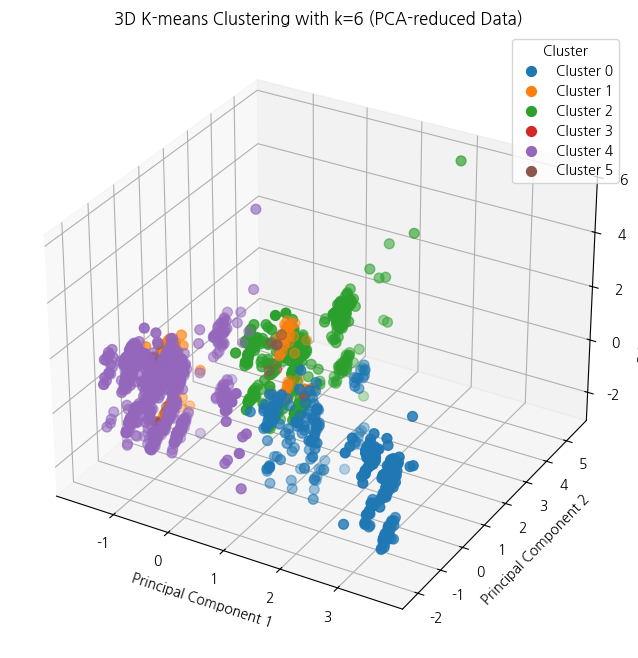

In [9]:
# PCA를 사용하여 데이터를 3차원으로 축소
pca_3d = PCA(n_components=3)
X1_pca_3d = pca_3d.fit_transform(X1_scaled)

# 3차원 데이터 프레임 생성
df_pca_3d = pd.DataFrame(X1_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_3d['Cluster'] = y_kmeans

# 3차원 클러스터링 결과 시각화
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 각 클러스터에 대해 반복하면서 3D 산점도를 그림
for i in range(6):  # k=6 클러스터
    ax.scatter(df_pca_3d.loc[df_pca_3d['Cluster'] == i, 'PC1'], 
               df_pca_3d.loc[df_pca_3d['Cluster'] == i, 'PC2'], 
               df_pca_3d.loc[df_pca_3d['Cluster'] == i, 'PC3'], 
               s=50, label=f'Cluster {i}')

ax.set_title('3D K-means Clustering with k=6 (PCA-reduced Data)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.legend(title='Cluster')
plt.show()

In [10]:
# df_km이라는 데이터프레임에 'c1' 열을 추가하고, 여기에 클러스터링 결과 할당
df_derive['c1'] = y_kmeans
X['c1'] = y_kmeans
X.head()

,재발여부,환자통증정도,통증기간(월),가족력,성별,연령대,입원기간,직업,수술 받은 계절,BMI,c1
0,0,7,0.2,0.0,0,30-40대,1,사무직,봄,24.772097,4
1,0,7,5.0,1.0,0,10-20대,1,군인,봄,23.661439,0
2,0,5,24.0,0.0,0,10-20대,1,Unknown,봄,21.705129,0
3,0,7,2.0,0.0,0,10-20대,1,학생,겨울,23.661439,0
4,0,8,1.0,0.0,0,50-60대,2,농업,봄,27.943098,2


## 4) 재발률에 따른 클러스터 결합

In [11]:
# 클러스터 번호별로 재발률 비율 계산
recurrence_rate_per_cluster = df_derive.groupby('c1')['재발여부'].sum()/len(df_derive)

# 결과를 오름차순으로 정렬하여 출력
sorted_recurrence_rate = recurrence_rate_per_cluster.sort_values(ascending=True)
print(sorted_recurrence_rate)

c1
5    0.000529
3    0.002647
1    0.004235
0    0.013235
2    0.033351
4    0.064055
Name: 재발여부, dtype: float64


Group 4,2: 0.0487
Group 0,1: 0.0087
Group 3,5: 0.0016


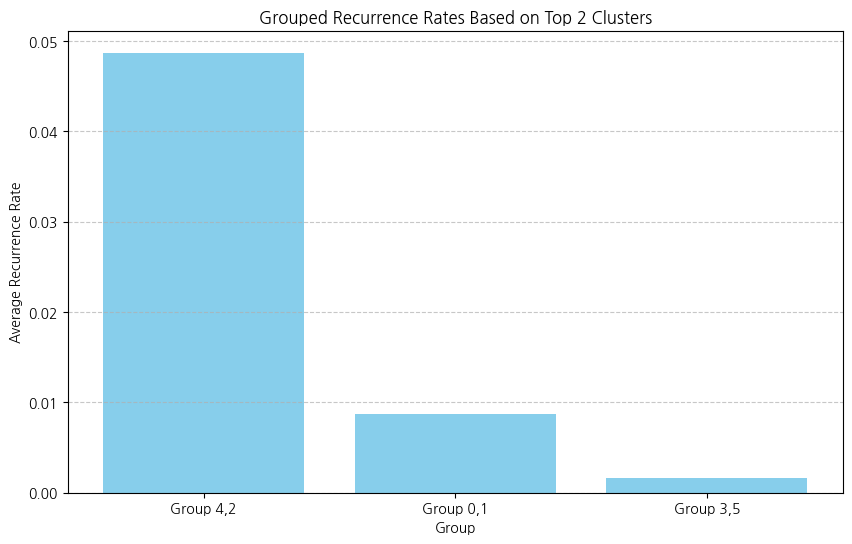

In [12]:
# 재발률 데이터
recurrence_rate = {
    5: 0.000529,
    3: 0.002647,
    1: 0.004235,
    0: 0.013235,
    2: 0.033351,
    4: 0.064055
}

# 클러스터를 그룹화
grouped_clusters = {
    'Group 4,2': [4, 2],  # 가장 높은 재발률을 가진 클러스터 2개
    'Group 0,1': [0, 1],  # 다음으로 높은 재발률을 가진 클러스터 2개
    'Group 3,5': [3, 5]  # 남은 클러스터들
}

# 그룹별 재발률 비율 계산
grouped_rates = {}
for group, clusters in grouped_clusters.items():
    total_rate = sum(recurrence_rate[cluster] for cluster in clusters) / len(clusters)
    grouped_rates[group] = total_rate

# 그룹별 재발률 비율 출력
for group, rate in grouped_rates.items():
    print(f"{group}: {rate:.4f}")

# 그룹별 재발률 비율을 바탕으로 막대 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(grouped_rates.keys(), grouped_rates.values(), color='skyblue')
plt.title('Grouped Recurrence Rates Based on Top 2 Clusters')
plt.xlabel('Group')
plt.ylabel('Average Recurrence Rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5) 클러스터에 따른 특성 확인
결합된 각 클러스터의 특징은 다음과 같음.

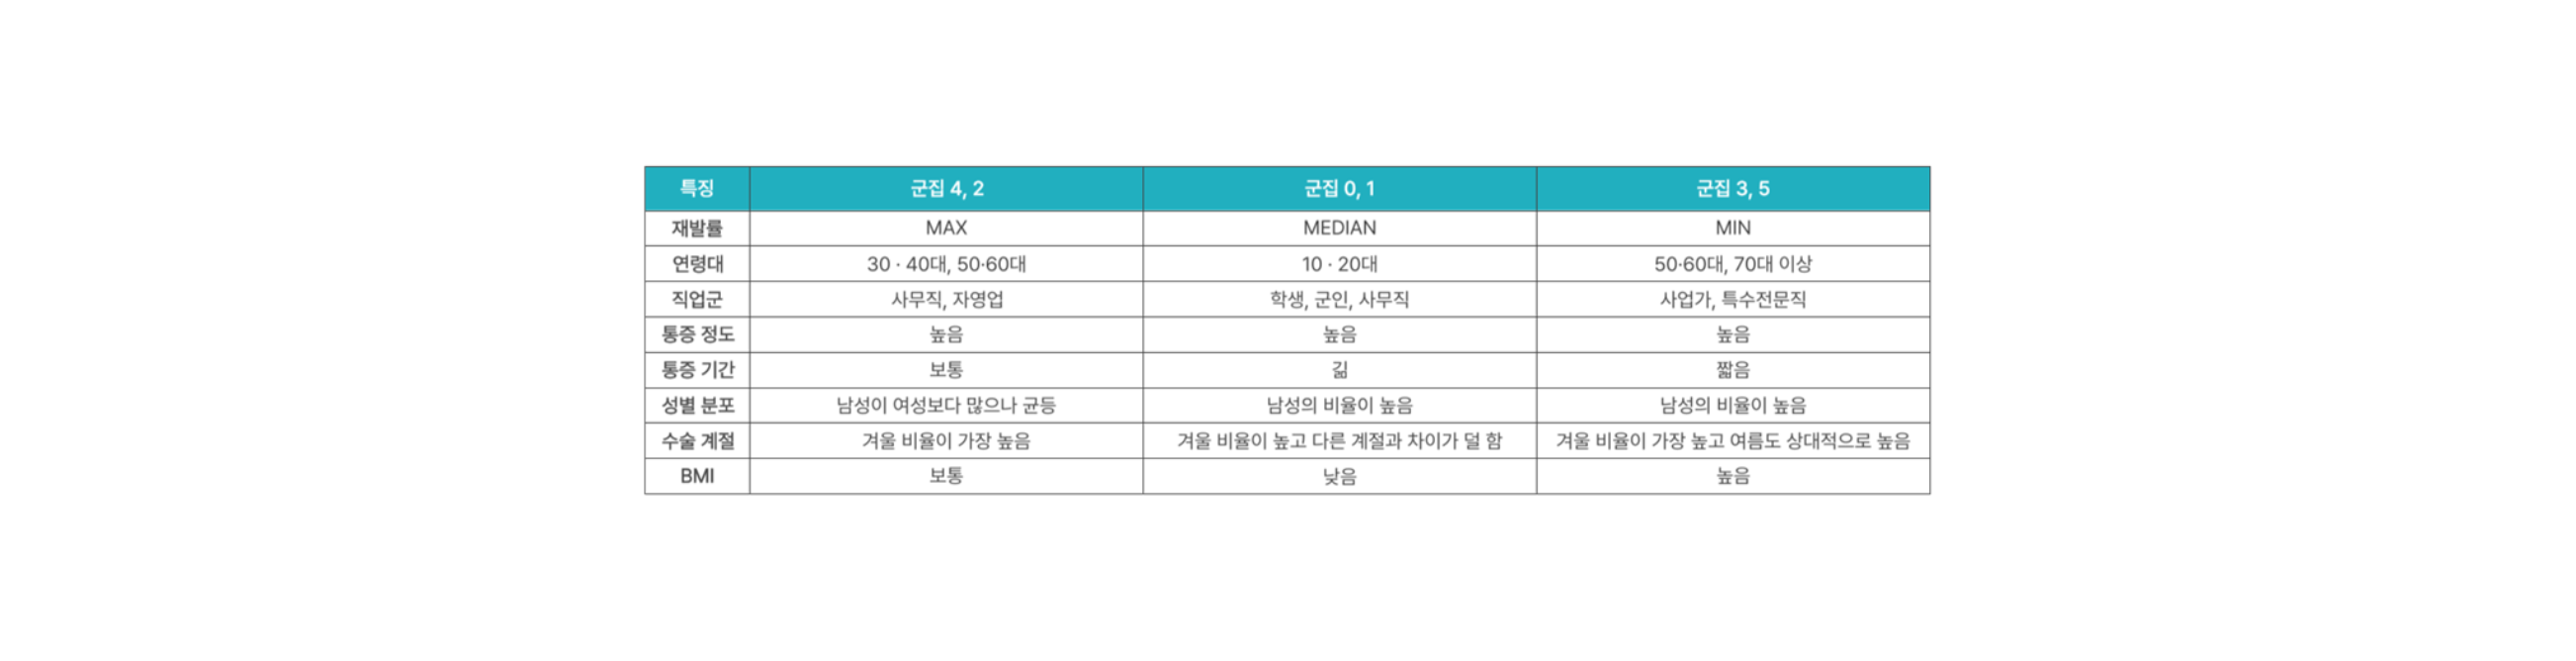

In [20]:
group_4_2 = df_derive[df_derive['c1'].isin([4, 2])]
group_0_1 = df_derive[df_derive['c1'].isin([0, 1])]
group_3_5 = df_derive[df_derive['c1'].isin([3, 5])]

features = ['환자통증정도', '통증기간(월)', '가족력', '성별', '연령대', '입원기간', '직업', '수술 받은 계절', 'BMI']

comparison = {}
for feature in features:
    if feature == '디스크위치' or df_derive[feature].dtype == 'object' or df_derive[feature].nunique() < 10:  # '디스크위치' 및 기타 분류형 특성의 경우
        group_4_2_ratio = group_4_2[feature].value_counts(normalize=True)
        group_0_1_ratio = group_0_1[feature].value_counts(normalize=True)
        group_3_5_ratio = group_3_5[feature].value_counts(normalize=True)
        comparison[feature] = {
            'Group 4,2': group_4_2_ratio, 
            'Group 0,1': group_0_1_ratio, 
            'Group 3,5': group_3_5_ratio
        }
    else:  # 연속형 특성의 경우
        group_4_2_mean = group_4_2[feature].mean()
        group_0_1_mean = group_0_1[feature].mean()
        group_3_5_mean = group_3_5[feature].mean()
        comparison[feature] = {
            'Group 4,2': group_4_2_mean, 
            'Group 0,1': group_0_1_mean, 
            'Group 3,5': group_3_5_mean
        }

for feature, comp in comparison.items():
    print()
    print(f"{feature}:\nGroup 4,2: {comp['Group 4,2']}\nGroup 0,1: {comp['Group 0,1']}\nGroup 3,5: {comp['Group 3,5']}\n")
    print('*'*100)


환자통증정도:
Group 4,2: 6.9727339719970525
Group 0,1: 6.630573248407643
Group 3,5: 6.950819672131147

****************************************************************************************************

통증기간(월):
Group 4,2: 5.599263080324245
Group 0,1: 6.79447983014862
Group 3,5: 4.762295081967213

****************************************************************************************************

가족력:
Group 4,2: 가족력
0.0    0.950626
1.0    0.049374
Name: proportion, dtype: float64
Group 0,1: 가족력
0.0    0.953291
1.0    0.046709
Name: proportion, dtype: float64
Group 3,5: 가족력
0.0    0.95082
1.0    0.04918
Name: proportion, dtype: float64

****************************************************************************************************

성별:
Group 4,2: 성별
0    0.62196
1    0.37804
Name: proportion, dtype: float64
Group 0,1: 성별
0    0.585987
1    0.414013
Name: proportion, dtype: float64
Group 3,5: 성별
0    0.721311
1    0.278689
Name: proportion, dtype: float64

****************************

In [17]:
# #모델 저장
# from sklearn.cluster import KMeans
# import joblib

# # 학습된 모델을 'kmeans_model.pkl' 파일로 저장
# joblib.dump(kmeans, 'kmeans_model.pkl')